# LF Log Data Analysis

This notebook analyzes the LF operation log data. The goals are:
1. Read data from `LF-Log.csv`.
2. Handle missing data.
3. Normalize date and time columns.
4. Fix the 'ngay' column (convert 1-31 to full dates in December).
5. Perform EDA.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

## 1. Load Data

In [31]:
file_path = 'merged_lf_data.csv'
df = pd.read_csv(file_path)

# Display first few rows and info
display(df.head())
display(df.info())

,ngay,Ca,me_tinh_luyen_so,mac_thep_yeu_cau,thoi_gian_vao_tinh_luyen,bat_dau,ket_thuc,thoi_gian_len_duc,thung_lf,lan_luyen_thu,nhiet_do_vao_tl,C_truoc,Si_truoc,Mn_truoc,S_truoc,P_truoc,khoi_luong_thung_thep,FeSi,FeMn,SiMn,than,FeCr,FeV,Niken,FeP,Cu,khac,huynh_thach,nhom_thoi,voi_song,dolomite,quaczit,day_feca,day_casi,day_ca_dac,xi_bao_on,thoi_gian_danh_dien,tieu_thu_dien,C_sau,Si_sau,Mn_sau,S_sau,P_sau,Al,Canxi,nhiet_do_lan_1,nhiet_do_ra_thep,nhiet_do_duc_yeu_cau,nhiet_do_do_tren_duc,thoi_gian_dinh_tre,ly_do_dinh_tre,ghi_chu_1,thoi_gian_bat_dau_thoi_mem,thoi_gian_ket_thu_thoi_mem,tong_thoi_gian_thoi_mem,tinh_trang_xi_lo_thoi_qua_tinh_luyen,tinh_trang_xi,ghi_chu,source_year,source_month,source_lf
0,1.0,1B,B6106,SAE1006-Al,09:30:00,08:35:00,10:02:00,10:16:00,6.0,1.0,1550.0,0.01,0.002,0.06,0.009,0.007,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,250.0,750.0,NaN,NaN,NaN,NaN,380.0,3.0,NaN,NaN,0.03,0.022,0.16,0.002,0.010,288.0,48.0,NaN,NaN,NaN,NaN,20.0,NỐI THAN,NaN,10:06:00,10:14:00,8.0,ĐEN,BÌNH THƯỜNG,NaN,2025,10,2
1,1.0,1B,B6107,SAE1006-Al,09:24:00,10:08:00,10:44:00,10:58:00,16.0,1.0,1534.0,0.02,0.003,0.11,0.019,0.009,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,230.0,700.0,NaN,NaN,NaN,NaN,320.0,3.0,NaN,NaN,0.03,0.013,0.16,0.004,0.010,248.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:47:00,10:55:00,8.0,ĐEN,BÌNH THƯỜNG,NaN,2025,10,2
2,1.0,1B,C6279,SAE1006-Al,10:22:00,10:52:00,11:30:00,11:42:00,17.0,1.0,1546.0,0.02,0.005,0.12,0.010,0.015,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,120.0,850.0,NaN,NaN,NaN,NaN,320.0,3.0,NaN,NaN,0.04,0.013,0.16,0.015,0.003,279.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:33:00,11:41:00,8.0,ĐEN,BÌNH THƯỜNG,NaN,2025,10,2
3,1.0,1B,B6109,SAE1006-Al,11:10:00,11:32:00,12:16:00,12:30:00,11.0,1.0,1530.0,0.03,0.002,0.10,0.007,0.005,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,140.0,800.0,NaN,NaN,NaN,NaN,300.0,3.0,NaN,NaN,0.05,0.007,0.15,0.004,0.007,275.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12:19:00,11:41:00,8.0,ĐEN,BÌNH THƯỜNG,NaN,2025,10,2
4,1.0,1B,B6110,SAE1006-Al,11:56:00,12:21:00,13:05:00,13:17:00,2.0,1.0,1584.0,0.02,0.003,0.10,0.007,0.008,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,120.0,650.0,NaN,NaN,NaN,NaN,420.0,3.0,NaN,NaN,0.04,0.006,0.16,0.003,0.009,257.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13:08:00,12:27:00,8.0,ĐEN,BÌNH THƯỜNG,NaN,2025,10,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 61 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ngay                                  4383 non-null   object 
 1   Ca                                    4397 non-null   object 
 2   me_tinh_luyen_so                      4440 non-null   object 
 3   mac_thep_yeu_cau                      4440 non-null   object 
 4   thoi_gian_vao_tinh_luyen              4440 non-null   object 
 5   bat_dau                               4438 non-null   object 
 6   ket_thuc                              4404 non-null   object 
 7   thoi_gian_len_duc                     4382 non-null   object 
 8   thung_lf                              4437 non-null   float64
 9   lan_luyen_thu                         4437 non-null   float64
 10  nhiet_do_vao_tl                       4440 non-null   float64
 11  C_truoc          

None

## 2. Data Cleaning & Preprocessing

### 2.1 Fix 'ngay' (Date) column
The 'ngay' column contains mixed formats: full dates (e.g., '01/12/2025'), integers (1-31), or NaN. We need to standardize this to a Datetime object representing December 2025.

In [32]:
def clean_date_row(row):
    # Lấy giá trị ngày và thông tin nguồn từ dòng hiện tại
    val = row.get('ngay')
    year = row.get('source_year')
    month = row.get('source_month')
    
    if pd.isna(val) or val == '':
        return np.nan
    
    str_val = str(val).strip()
    
    # Trường hợp 1: Nếu là ngày đầy đủ (có chứa '/')
    if '/' in str_val:
        return pd.to_datetime(str_val, dayfirst=True)
    
    # Trường hợp 2: Nếu chỉ là số ngày (1-31)
    try:
        day = int(float(str_val))
        
        # Kiểm tra nếu năm/tháng bị thiếu (NaN)
        if pd.isna(year) or pd.isna(month):
            return np.nan
            
        # Tạo timestamp từ source_year và source_month
        return pd.Timestamp(year=int(year), month=int(month), day=day)
    except (ValueError, TypeError):
        return np.nan

# Áp dụng hàm xử lý cho từng dòng (axis=1) thay vì chỉ cột 'ngay'
# Lưu ý: Cần chắc chắn bạn đã reload lại pd.read_csv(...) để có cột source_year/month
if 'source_year' in df.columns and 'source_month' in df.columns:
    df['ngay_clean'] = df.apply(clean_date_row, axis=1)
else:
    print("⚠️ Cảnh báo: Không tìm thấy cột 'source_year' hoặc 'source_month'.")
    print("Vui lòng chạy lại cell 'Load Data' sau khi đã cập nhật file CSV.")
    # Fallback tạm thời nếu chưa reload data (chỉ để tránh lỗi code)
    df['ngay_clean'] = pd.to_datetime(df['ngay'], dayfirst=True, errors='coerce')


# Forward fill: Lấp đầy các ngày bị thiếu bằng ngày của dòng liền trước
# Lưu ý: Điều này giả định các dòng trong cùng một file/tháng được xếp liên tục
df['ngay_clean'] = df['ngay_clean'].ffill()

# Kiểm tra lại kết quả
print("Thống kê dữ liệu ngày sau khi xử lý:")
print("- Các năm:", df['ngay_clean'].dt.year.unique())
print("- Các tháng:", df['ngay_clean'].dt.month.unique())
print("- Số lượng giá trị Unique:", len(df['ngay_clean'].unique()))

# Xem mẫu một vài dòng để kiểm chứng
display(df[['ngay', 'source_year', 'source_month', 'ngay_clean']].head(10))

Thống kê dữ liệu ngày sau khi xử lý:
- Các năm: [2025]
- Các tháng: [10 11 12]
- Số lượng giá trị Unique: 90


,ngay,source_year,source_month,ngay_clean
0,1.0,2025,10,2025-10-01
1,1.0,2025,10,2025-10-01
2,1.0,2025,10,2025-10-01
3,1.0,2025,10,2025-10-01
4,1.0,2025,10,2025-10-01
5,1.0,2025,10,2025-10-01
6,1.0,2025,10,2025-10-01
7,1.0,2025,10,2025-10-01
8,1.0,2025,10,2025-10-01
9,1.0,2025,10,2025-10-01


### 2.2 Handle Missing Data
Evaluate missing values.

In [33]:
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

ngay                                      57
Ca                                        43
bat_dau                                    2
ket_thuc                                  36
thoi_gian_len_duc                         58
thung_lf                                   3
lan_luyen_thu                              3
C_truoc                                   10
Si_truoc                                  13
Mn_truoc                                  10
S_truoc                                   11
P_truoc                                   11
khoi_luong_thung_thep                   4374
FeSi                                    4436
FeMn                                      13
SiMn                                    4437
than                                    4311
FeCr                                    4440
FeV                                     4439
Niken                                   4440
FeP                                     4440
Cu                                      4440
khac      

In [34]:
# Strategy for filling missing values:
# - Additive columns (FeSi, FeMn, than, etc.) likely mean 0 additions if empty.
# - Logistical info (Time, Temperature) might be better left as NaN or interpolated depending on context.

# List of columns that are likely additives/measurements where NaN = 0
additive_cols = [
    'FeSi', 'FeMn', 'SiMn', 'than', 'FeCr', 'FeV', 'Niken', 'FeP', 'Cu', 'khac', 
    'huynh_thach', 'nhom_thoi', 'voi_song', 'dolomite', 'quaczit', 
    'day_feca', 'day_casi', 'day_ca_dac', 'xi_bao_on'
]

# Fill these with 0
for col in additive_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

print("Missing values after filling additives:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Missing values after filling additives:
ngay                                      57
Ca                                        43
bat_dau                                    2
ket_thuc                                  36
thoi_gian_len_duc                         58
thung_lf                                   3
lan_luyen_thu                              3
C_truoc                                   10
Si_truoc                                  13
Mn_truoc                                  10
S_truoc                                   11
P_truoc                                   11
khoi_luong_thung_thep                   4374
thoi_gian_danh_dien                     2231
tieu_thu_dien                           2230
C_sau                                     91
Si_sau                                    91
Mn_sau                                    92
S_sau                                     93
P_sau                                     95
Al                                       101
Canxi          

### 2.3 Normalize Time Columns
Convert time strings to datetime objects, combining with the cleaning Date.

In [35]:
time_cols = [
    'thoi_gian_vao_tinh_luyen', 'bat_dau', 'ket_thuc', 'thoi_gian_len_duc',
    'thoi_gian_bat_dau_thoi_mem', 'thoi_gian_ket_thu_thoi_mem'
]

def combine_date_time(row, time_col_name, date_col_name='ngay_clean'):
    time_val = row[time_col_name]
    date_val = row[date_col_name]
    
    if pd.isna(time_val) or pd.isna(date_val):
        return pd.NaT
    
    try:
        # Parse time string possibly in various formats or just HH:MM:SS
        str_time = str(time_val).strip()
        # Handle cases like "08:00" or "08:00:00"
        
        # Create a dummy timestamp to extract time
        parsed_time = pd.to_datetime(str_time, format='%H:%M:%S', errors='coerce')
        if pd.isna(parsed_time):
             parsed_time = pd.to_datetime(str_time, format='%H:%M', errors='coerce')
        
        if pd.isna(parsed_time):
            return pd.NaT
            
        h, m, s = parsed_time.hour, parsed_time.minute, parsed_time.second
        
        full_dt = date_val.replace(hour=h, minute=m, second=s)
        
        # Handle midnight crossing if necessary (though simple combination doesn't know context yet)
        # We'll refine this later if we see start > end
        return full_dt
    except Exception as e:
        return pd.NaT

for col in time_cols:
    if col in df.columns:
        df[col + '_dt'] = df.apply(combine_date_time, axis=1, args=(col,))

# Handle Midnight Crossing for 'ket_thuc' (End Time)
# If End Time < Start Time, assume next day
# Using 'bat_dau' (Start) vs 'ket_thuc' (End)
if 'bat_dau_dt' in df.columns and 'ket_thuc_dt' in df.columns:
    mask = df['ket_thuc_dt'] < df['bat_dau_dt']
    df.loc[mask, 'ket_thuc_dt'] += pd.Timedelta(days=1)
    print(f"Adjusted {mask.sum()} rows for midnight crossing.")

display(df[['ngay_clean', 'bat_dau_dt', 'ket_thuc_dt']].head(10))

Adjusted 144 rows for midnight crossing.


,ngay_clean,bat_dau_dt,ket_thuc_dt
0,2025-10-01,2025-10-01 08:35:00,2025-10-01 10:02:00
1,2025-10-01,2025-10-01 10:08:00,2025-10-01 10:44:00
2,2025-10-01,2025-10-01 10:52:00,2025-10-01 11:30:00
3,2025-10-01,2025-10-01 11:32:00,2025-10-01 12:16:00
4,2025-10-01,2025-10-01 12:21:00,2025-10-01 13:05:00
5,2025-10-01,2025-10-01 13:15:00,2025-10-01 14:02:00
6,2025-10-01,2025-10-01 14:27:00,2025-10-01 15:23:00
7,2025-10-01,2025-10-01 15:26:00,2025-10-01 16:02:00
8,2025-10-01,2025-10-01 16:04:00,2025-10-01 16:50:00
9,2025-10-01,2025-10-01 16:52:00,2025-10-01 17:39:00


In [37]:
for col in time_cols:
    dt_col = f"{col}_dt"
    if dt_col in df.columns:
        df[col] = df.pop(dt_col)

if 'ngay_clean' in df.columns:
    df['ngay'] = df.pop('ngay_clean')

In [39]:
print(df.dtypes.to_string())

ngay                                    datetime64[ns]
Ca                                              object
me_tinh_luyen_so                                object
mac_thep_yeu_cau                                object
thoi_gian_vao_tinh_luyen                datetime64[ns]
bat_dau                                 datetime64[ns]
ket_thuc                                datetime64[ns]
thoi_gian_len_duc                       datetime64[ns]
thung_lf                                       float64
lan_luyen_thu                                  float64
nhiet_do_vao_tl                                float64
C_truoc                                        float64
Si_truoc                                       float64
Mn_truoc                                       float64
S_truoc                                        float64
P_truoc                                        float64
khoi_luong_thung_thep                          float64
FeSi                                           float64
FeMn      

In [53]:
df

,ngay,Ca,me_tinh_luyen_so,mac_thep_yeu_cau,thoi_gian_vao_tinh_luyen,bat_dau,ket_thuc,thoi_gian_len_duc,thung_lf,lan_luyen_thu,nhiet_do_vao_tl,C_truoc,Si_truoc,Mn_truoc,S_truoc,P_truoc,khoi_luong_thung_thep,FeSi,FeMn,SiMn,than,FeCr,FeV,Niken,FeP,Cu,khac,huynh_thach,nhom_thoi,voi_song,dolomite,quaczit,day_feca,day_casi,day_ca_dac,xi_bao_on,thoi_gian_danh_dien,tieu_thu_dien,C_sau,Si_sau,Mn_sau,S_sau,P_sau,Al,Canxi,nhiet_do_lan_1,nhiet_do_ra_thep,nhiet_do_duc_yeu_cau,nhiet_do_do_tren_duc,thoi_gian_dinh_tre,ly_do_dinh_tre,ghi_chu_1,thoi_gian_bat_dau_thoi_mem,thoi_gian_ket_thu_thoi_mem,tong_thoi_gian_thoi_mem,tinh_trang_xi_lo_thoi_qua_tinh_luyen,tinh_trang_xi,ghi_chu,source_year,source_month,source_lf,processing_time_min,wait_time_min,temp_loss
0,2025-10-01,1B,B6106,SAE1006-Al,2025-10-01 09:30:00,2025-10-01 08:35:00,2025-10-01 10:02:00,2025-10-01 10:16:00,6.0,1.0,1550.0,0.010,0.002,0.060,0.009,0.007,NaN,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,250.0,750.0,0.0,0.0,0.0,0.0,380.0,3.0,NaN,NaN,0.030,0.022,0.160,0.002,0.010,288.00,48.00,NaN,NaN,NaN,NaN,20.0,NỐI THAN,NaN,2025-10-01 10:06:00,2025-10-01 10:14:00,8.0,ĐEN,BÌNH THƯỜNG,NaN,2025,10,2,87.0,-55.0,NaN
1,2025-10-01,1B,B6107,SAE1006-Al,2025-10-01 09:24:00,2025-10-01 10:08:00,2025-10-01 10:44:00,2025-10-01 10:58:00,16.0,1.0,1534.0,0.020,0.003,0.110,0.019,0.009,NaN,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,230.0,700.0,0.0,0.0,0.0,0.0,320.0,3.0,NaN,NaN,0.030,0.013,0.160,0.004,0.010,248.00,44.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-10-01 10:47:00,2025-10-01 10:55:00,8.0,ĐEN,BÌNH THƯỜNG,NaN,2025,10,2,36.0,44.0,NaN
2,2025-10-01,1B,C6279,SAE1006-Al,2025-10-01 10:22:00,2025-10-01 10:52:00,2025-10-01 11:30:00,2025-10-01 11:42:00,17.0,1.0,1546.0,0.020,0.005,0.120,0.010,0.015,NaN,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,120.0,850.0,0.0,0.0,0.0,0.0,320.0,3.0,NaN,NaN,0.040,0.013,0.160,0.015,0.003,279.00,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-10-01 11:33:00,2025-10-01 11:41:00,8.0,ĐEN,BÌNH THƯỜNG,NaN,2025,10,2,38.0,30.0,NaN
3,2025-10-01,1B,B6109,SAE1006-Al,2025-10-01 11:10:00,2025-10-01 11:32:00,2025-10-01 12:16:00,2025-10-01 12:30:00,11.0,1.0,1530.0,0.030,0.002,0.100,0.007,0.005,NaN,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,140.0,800.0,0.0,0.0,0.0,0.0,300.0,3.0,NaN,NaN,0.050,0.007,0.150,0.004,0.007,275.00,37.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-10-01 12:19:00,2025-10-01 11:41:00,8.0,ĐEN,BÌNH THƯỜNG,NaN,2025,10,2,44.0,22.0,NaN
4,2025-10-01,1B,B6110,SAE1006-Al,2025-10-01 11:56:00,2025-10-01 12:21:00,2025-10-01 13:05:00,2025-10-01 13:17:00,2.0,1.0,1584.0,0.020,0.003,0.100,0.007,0.008,NaN,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,120.0,650.0,0.0,0.0,0.0,0.0,420.0,3.0,NaN,NaN,0.040,0.006,0.160,0.003,0.009,257.00,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-10-01 13:08:00,2025-10-01 12:27:00,8.0,ĐEN,BÌNH THƯỜNG,NaN,2025,10,2,44.0,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,2025-12-31,2B,C8481,SAE1006AL-V1,2025-12-31 02:53:00,2025-12-31 03:28:00,2025-12-31 03:59:00,2025-12-31 04:12:00,29.0,1.0,1548.0,0.029,0.005,0.130,0.004,0.011,NaN,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,650.0,0.0,0.0,0.0,0.0,400.0,0.0,21:14,4993.0,0.040,0.009,0.163,0.002,0.010,311.86,24.33,1581.0,1576.0,NaN,NaN,NaN,NaN,NaN,2025-12-31 04:01:00,2025-12-31 04:09:00,00:08:00,ĐEN,BÌNH THƯỜNG,NaN,2025,12,5,31.0,35.0,5.0
4436,2025-12-31,2B,C8482,SAE1006AL-V1,2025-12-31 03:49:00,2025-12-31 04:01:00,2025-12-31 04:40:00,2025-12-31 04:53:00,11.0,1.0,1527.0,0.033,0.004,0.129,0.006,0.012,NaN,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,900.0,0.0,0.0,0.0,0.0,380.0,0.0,26:29,5150.0,0.033,0.010,0.163,0.003,0.011,271.67,34.45,1583.0,1578.0,NaN,NaN,NaN,NaN,NaN,2025-12-31 04:42:00,2025-12-31 04:50:00,00:08:00,ĐEN,BÌNH THƯỜNG,NaN,2025,12,5,39.0,12.0,5.0
4437,2025-12-31,2B,C8483,SAE1006AL-V1,2025-12-31 04:16

## 3. EDA (Exploratory Data Analysis)

### 3.1 Processing Time Analysis

In [40]:
# Calculate duration in minutes
if 'bat_dau_dt' in df.columns and 'ket_thuc_dt' in df.columns:
    df['processing_duration_min'] = (df['ket_thuc_dt'] - df['bat_dau_dt']).dt.total_seconds() / 60

    plt.figure(figsize=(10, 5))
    sns.histplot(df['processing_duration_min'], bins=30, kde=True)
    plt.title('Distribution of Processing Duration (Minutes)')
    plt.xlabel('Minutes')
    plt.show()
    
    print(df['processing_duration_min'].describe())

### 3.2 Alloy Consumption

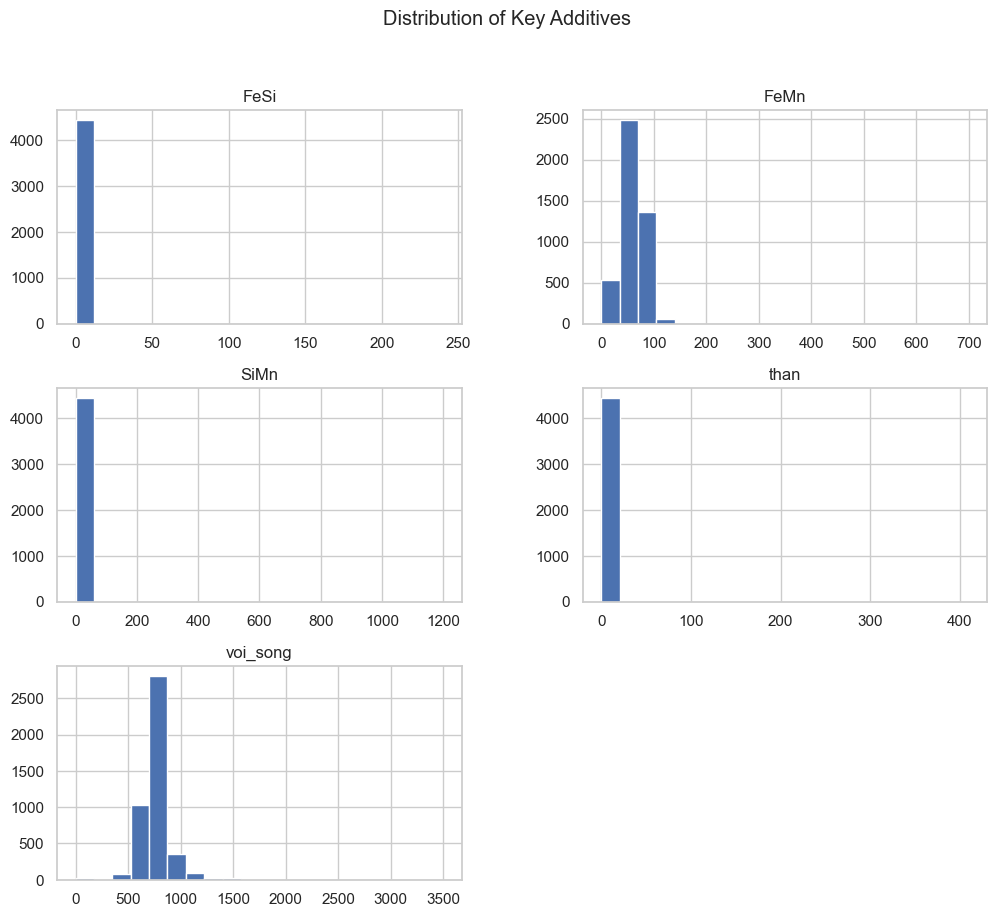

In [41]:
additives = ['FeSi', 'FeMn', 'SiMn', 'than', 'voi_song']
existing_additives = [col for col in additives if col in df.columns]

if existing_additives:
    df[existing_additives].hist(figsize=(12, 10), bins=20)
    plt.suptitle("Distribution of Key Additives")
    plt.show()

### 3.3 Production Count by Day

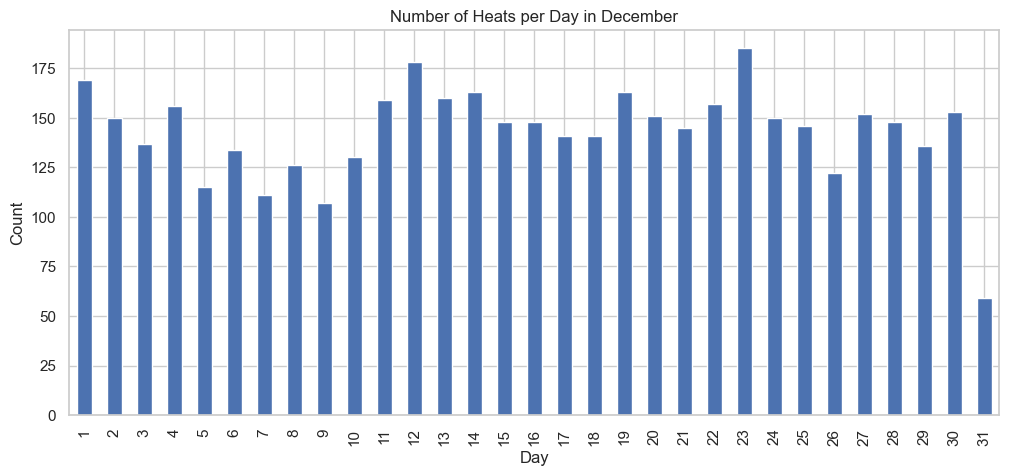

In [42]:
daily_counts = df.groupby(df['ngay'].dt.day).size()

plt.figure(figsize=(12, 5))
daily_counts.plot(kind='bar')
plt.title('Number of Heats per Day in December')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

### 3.4 Temperature Drop Analysis
Difference between 'nhiet_do_vao_tl' (Input Temp) and 'nhiet_do_ra_thep' (Output Temp if available) or target.

Temperature columns: ['nhiet_do_vao_tl', 'nhiet_do_lan_1', 'nhiet_do_ra_thep', 'nhiet_do_duc_yeu_cau', 'nhiet_do_do_tren_duc']


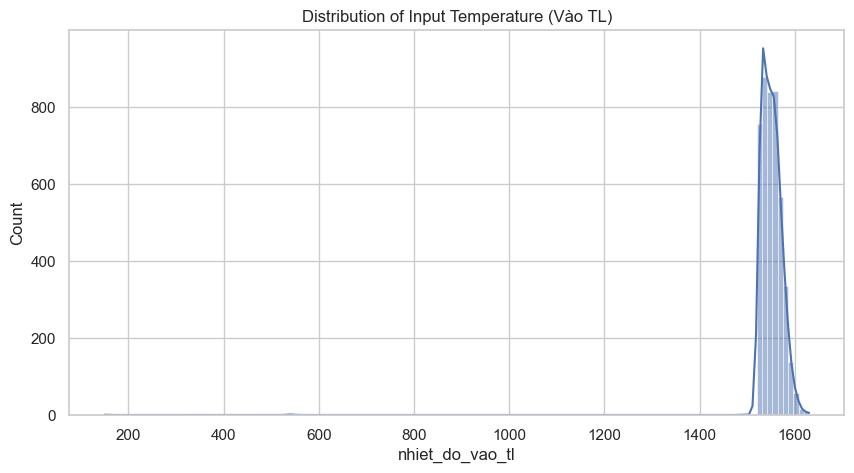

In [43]:
# Example: Check columns for temperature
temp_cols = [c for c in df.columns if 'nhiet' in c.lower()]
print("Temperature columns:", temp_cols)

if 'nhiet_do_vao_tl' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df['nhiet_do_vao_tl'].dropna(), kde=True)
    plt.title('Distribution of Input Temperature (Vào TL)')
    plt.show()

In [44]:
print("=== BASIC STATISTICS ===")
print(f"Total records: {len(df)}")
print(f"Date range: {df['ngay'].min()} to {df['ngay'].max()}")
print(f"Steel grades: {df['mac_thep_yeu_cau'].unique()}")
print(f"\nShifts distribution:")
print(df['Ca'].value_counts())

=== BASIC STATISTICS ===
Total records: 4440
Date range: 2025-10-01 00:00:00 to 2025-12-31 00:00:00
Steel grades: ['SAE1006-Al' 'SAE1006AL' 'SAE1006Al-V1' 'SAE1006Al-V2' 'SAE1006AL V1'
 'SAE1006ALV1' 'SAE1006ALV2' 'SAE1006AL-V1' 'SAE1006AL-V2']

Shifts distribution:
Ca
2A    820
2C    799
2B    799
1A    685
1B    668
1C    626
Name: count, dtype: int64


In [45]:
key_numeric_cols = ['nhiet_do_vao_tl', 'nhiet_do_lan_1', 'nhiet_do_ra_thep', 'Al', 'FeMn', 'nhom_thoi', 'voi_song', 'day_ca_dac']
df[key_numeric_cols].describe()

,nhiet_do_vao_tl,nhiet_do_lan_1,nhiet_do_ra_thep,Al,FeMn,nhom_thoi,voi_song,day_ca_dac
count,4440.000000,4.357000e+03,4.348000e+03,4339.000000,4440.000000,4440.000000,4440.000000,4440.000000
mean,1550.470946,2.301898e+03,2.292298e+03,276.100834,57.621396,96.466441,745.096847,340.515766
std,35.533954,4.701192e+04,4.705925e+04,50.086864,23.575594,41.801344,157.230844,65.624127
min,150.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1534.000000,1.570000e+03,1.578000e+03,257.000000,45.000000,70.000000,650.000000,300.000000
50%,1549.000000,1.585000e+03,1.580000e+03,276.000000,60.000000,90.000000,750.000000,340.000000
75%,1564.000000,1.590000e+03,1.584000e+03,293.000000,70.000000,116.250000,800.000000,380.000000
max,1630.000000,3.104630e+06,3.104630e+06,2857.000000,700.000000,600.000000,3500.000000,950.000000


In [46]:
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
print("=== MISSING DATA (%) ===")
print(missing_pct)

=== MISSING DATA (%) ===
nhiet_do_do_tren_duc                    100.00
nhiet_do_duc_yeu_cau                     99.98
ghi_chu                                  99.98
ghi_chu_1                                99.57
khoi_luong_thung_thep                    98.51
thoi_gian_dinh_tre                       94.71
ly_do_dinh_tre                           94.41
thoi_gian_danh_dien                      50.25
tieu_thu_dien                            50.23
thoi_gian_ket_thu_thoi_mem                2.48
Canxi                                     2.30
Al                                        2.27
P_sau                                     2.14
S_sau                                     2.09
thoi_gian_len_duc                         2.09
thoi_gian_bat_dau_thoi_mem                2.07
nhiet_do_ra_thep                          2.07
Mn_sau                                    2.07
C_sau                                     2.05
Si_sau                                    2.05
nhiet_do_lan_1                     

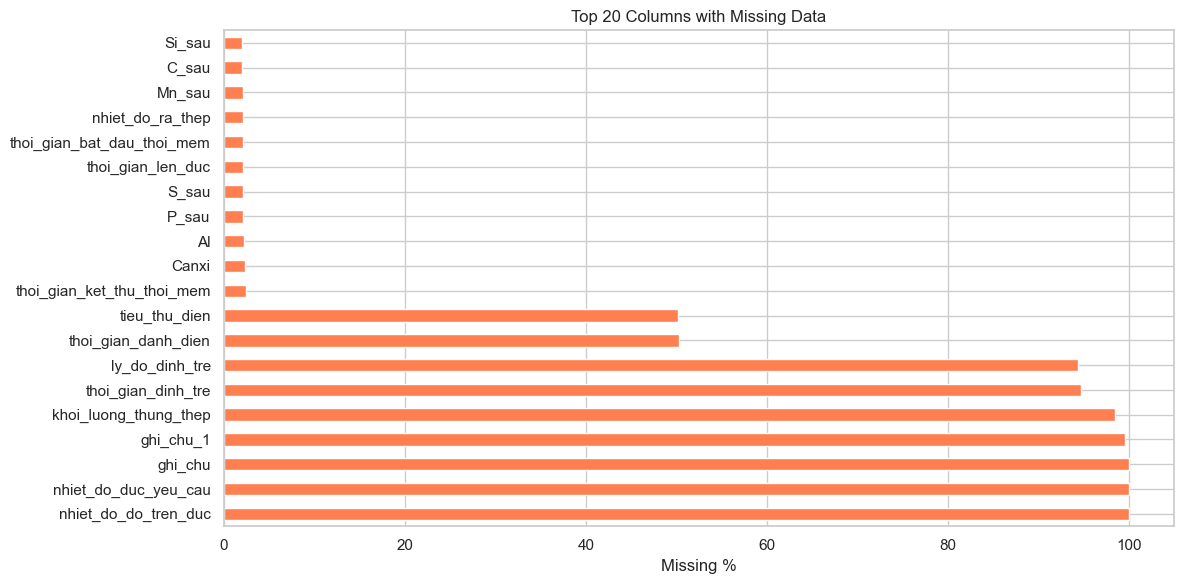

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
missing_pct.head(20).plot(kind='barh', ax=ax, color='coral')
ax.set_xlabel('Missing %')
ax.set_title('Top 20 Columns with Missing Data')
plt.tight_layout()
plt.show()

In [48]:
# Calculate processing duration (minutes)
df['processing_time_min'] = (df['ket_thuc'] - df['bat_dau']).dt.total_seconds() / 60
df['wait_time_min'] = (df['bat_dau'] - df['thoi_gian_vao_tinh_luyen']).dt.total_seconds() / 60

print("=== PROCESSING TIME (minutes) ===")
print(df['processing_time_min'].describe())

print("\n=== WAIT TIME (minutes) ===")
print(df['wait_time_min'].describe())

=== PROCESSING TIME (minutes) ===
count    4374.000000
mean       47.695473
std        86.847889
min         0.000000
25%        33.000000
50%        38.000000
75%        46.000000
max      1438.000000
Name: processing_time_min, dtype: float64

=== WAIT TIME (minutes) ===
count    4406.000000
mean       -3.975261
std       164.939894
min     -1433.000000
25%         7.000000
50%        13.000000
75%        22.000000
max       619.000000
Name: wait_time_min, dtype: float64


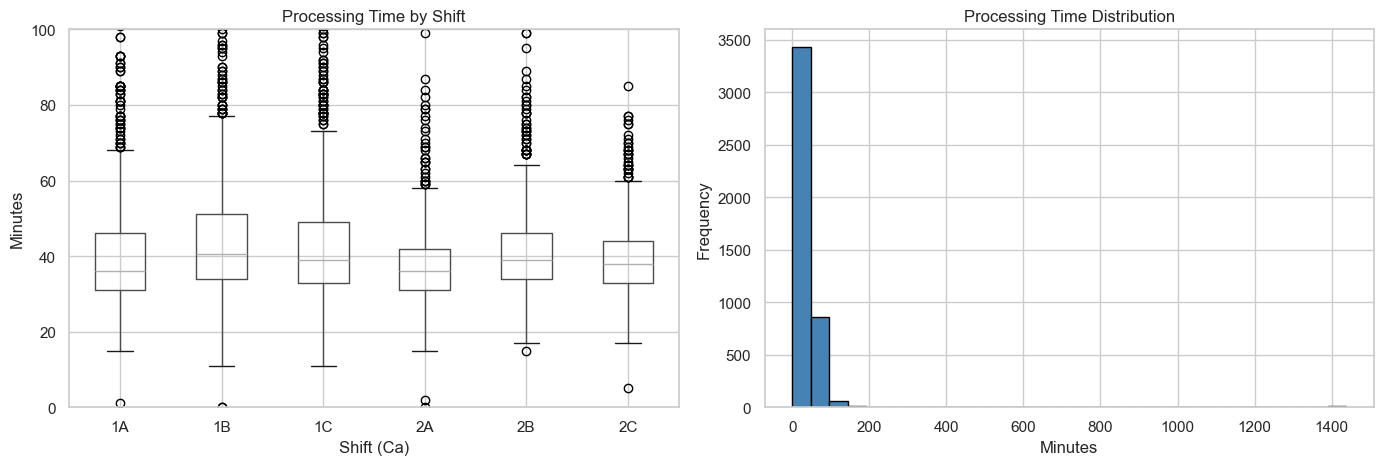

In [49]:
# Processing time by shift
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot by shift
df.boxplot(column='processing_time_min', by='Ca', ax=axes[0])
axes[0].set_title('Processing Time by Shift')
axes[0].set_xlabel('Shift (Ca)')
axes[0].set_ylabel('Minutes')
axes[0].set_ylim(0, 100)

# Distribution
df['processing_time_min'].hist(bins=30, ax=axes[1], color='steelblue', edgecolor='black')
axes[1].set_title('Processing Time Distribution')
axes[1].set_xlabel('Minutes')
axes[1].set_ylabel('Frequency')

plt.suptitle('')
plt.tight_layout()
plt.show()

In [50]:
df.nhiet_do_lan_1.describe()

count    4.357000e+03
mean     2.301898e+03
std      4.701192e+04
min      0.000000e+00
25%      1.570000e+03
50%      1.585000e+03
75%      1.590000e+03
max      3.104630e+06
Name: nhiet_do_lan_1, dtype: float64

=== TEMPERATURE STATISTICS ===
       nhiet_do_vao_tl  nhiet_do_lan_1  nhiet_do_ra_thep
count      4440.000000    4.357000e+03      4.348000e+03
mean       1550.470946    2.301898e+03      2.292298e+03
std          35.533954    4.701192e+04      4.705925e+04
min         150.000000    0.000000e+00      0.000000e+00
25%        1534.000000    1.570000e+03      1.578000e+03
50%        1549.000000    1.585000e+03      1.580000e+03
75%        1564.000000    1.590000e+03      1.584000e+03
max        1630.000000    3.104630e+06      3.104630e+06

Temperature Loss (lan_1 - ra_thep):
count     4347.000000
mean        11.812744
std        381.549572
min      -3010.000000
25%        -10.000000
50%          5.000000
75%          9.000000
max      14294.000000
Name: temp_loss, dtype: float64


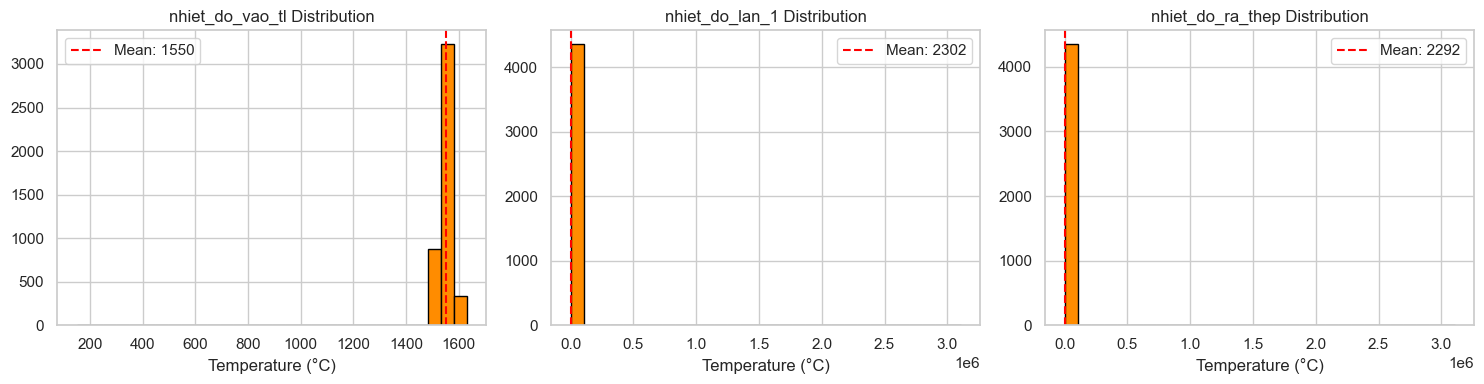

In [51]:
# Temperature statistics
temp_cols = ['nhiet_do_vao_tl', 'nhiet_do_lan_1', 'nhiet_do_ra_thep']
print("=== TEMPERATURE STATISTICS ===")
print(df[temp_cols].describe())

# Temperature loss
df['temp_loss'] = df['nhiet_do_lan_1'] - df['nhiet_do_ra_thep']
print(f"\nTemperature Loss (lan_1 - ra_thep):")
print(df['temp_loss'].describe())

# %%
# Temperature distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(temp_cols):
    df[col].hist(bins=30, ax=axes[i], color='darkorange', edgecolor='black')
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel('Temperature (°C)')
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.0f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

=== ALUMINUM (Al) STATISTICS ===
count    4339.000000
mean      276.100834
std        50.086864
min         0.000000
25%       257.000000
50%       276.000000
75%       293.000000
max      2857.000000
Name: Al, dtype: float64

Al by Shift:
          mean        std     min     max
Ca                                       
1A  276.840966  34.502359   0.288   390.0
1B  270.372720  36.470528   0.000   384.0
1C  275.900386  29.000654  26.000   362.0
2A  281.706179  28.654255  26.000   389.0
2B  275.784403  97.452545   0.000  2857.0
2C  275.503731  27.640026  26.000   398.0


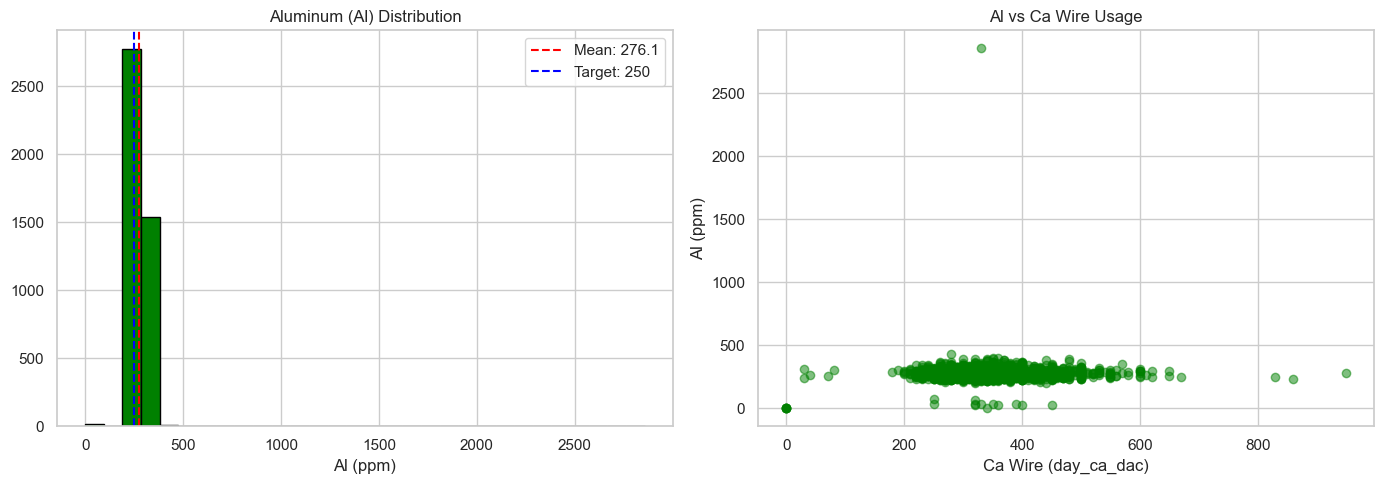

In [52]:
# %% [markdown]
# ### 3.5 Aluminum (Al) Analysis

# %%
print("=== ALUMINUM (Al) STATISTICS ===")
print(df['Al'].describe())

# Al by shift
print("\nAl by Shift:")
print(df.groupby('Ca')['Al'].agg(['mean', 'std', 'min', 'max']))

# %%
# Al distribution and relationship with Ca wire
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Al histogram
df['Al'].hist(bins=30, ax=axes[0], color='green', edgecolor='black')
axes[0].set_title('Aluminum (Al) Distribution')
axes[0].set_xlabel('Al (ppm)')
axes[0].axvline(df['Al'].mean(), color='red', linestyle='--', label=f'Mean: {df["Al"].mean():.1f}')
axes[0].axvline(250, color='blue', linestyle='--', label='Target: 250')
axes[0].legend()

# Al vs Ca wire
axes[1].scatter(df['day_ca_dac'], df['Al'], alpha=0.5, c='green')
axes[1].set_xlabel('Ca Wire (day_ca_dac)')
axes[1].set_ylabel('Al (ppm)')
axes[1].set_title('Al vs Ca Wire Usage')

plt.tight_layout()
plt.show()